In [1]:
from os import getcwd
from os.path import join, basename
from sys import path 

libs_dir = join("/".join(getcwd().split("/")[:-2]))
path.append(libs_dir)

filename = basename(globals()['__vsc_ipynb_file__']).split(".")[0]

import numpy as np
from libs.qchannel_model import *
import matplotlib.pyplot as plt
from libs.figure_config import *
from libs.default_parameters import *
# from libs.simulation_tools import *
from libs.satellite import *

In [2]:
satellite_1293 = LEOsatellite(
    libs_dir + '/data/STARLINK_1293.txt')
location_aizu = np.loadtxt(
    libs_dir + '/data/ogs_loc.txt')
location_sendai = np.loadtxt(
    libs_dir + '/data/ogs_loc_sendai.txt')
year = 2021
day = 357
hour = 16
minute = 29

t = np.arange(0, 241, 10) 
second = 56 + t 
utc = 9

latitude_bob = location_aizu[:, 0]
longitude_bob = location_aizu[:, 1]
elevation_bob = location_aizu[:, 2]

latitude_alice = location_sendai[:, 0]
longitude_alice = location_sendai[:, 1]
elevation_alice = location_sendai[:, 2]

# bob用のリスト
slant_path_bob_lst = np.zeros(len(second))
zenith_angle_bob_lst = np.zeros(len(second))

# alice用のリスト
slant_path_alice_lst = np.zeros(len(second))
zenith_angle_alice_lst = np.zeros(len(second))

for idx in range(len(second)):
    # bobとの幾何学的関係を計算
    slant_path_bob_lst[idx], zenith_angle_bob_lst[idx] = satellite_1293.computeGeometricWithUser(
        year, day, hour, minute, second[idx], utc,
        longitude_bob[0], latitude_bob[0], elevation_bob[0] # bobが単一の場合、[0]でアクセス
    )

    slant_path_alice_lst[idx], zenith_angle_alice_lst[idx] = satellite_1293.computeGeometricWithUser(
        year, day, hour, minute, second[idx], utc,
        longitude_alice[0], latitude_alice[0], elevation_alice[0]
    )

slant_path_bob_lst = slant_path_bob_lst * 1000
slant_path_alice_lst = slant_path_alice_lst * 1000

In [3]:
tau_zen_lst = np.array([0.81, 0.75, 0.56])
# tau_zen_lst = np.array([0.60])


qber_alice_values = np.zeros((len(tau_zen_lst), len(zenith_angle_alice_lst)))
yield_alice_values = np.zeros((len(tau_zen_lst), len(zenith_angle_alice_lst)))
qber_bob_values = np.zeros((len(tau_zen_lst), len(zenith_angle_bob_lst)))
yield_bob_values = np.zeros((len(tau_zen_lst), len(zenith_angle_bob_lst)))
qber_values = np.zeros((len(tau_zen_lst), len(zenith_angle_alice_lst)))
yield_values = np.zeros((len(tau_zen_lst), len(zenith_angle_alice_lst)))
skr_values = np.zeros((len(tau_zen_lst), len(zenith_angle_alice_lst)))

In [4]:
for idx in range(len(tau_zen_lst)):
    print(f"tau_zen = {tau_zen_lst[idx]}")
    tau_zen = tau_zen_lst[idx]
    for jdx in range(len(zenith_angle_alice_lst)):
        print(f"zenith_angle_alice = {zenith_angle_alice_lst[jdx]}")
        # print(f"zenith_angle_alice = {zenith_angle_alice_lst[jdx]}")
        
        zenith_angle_bob_deg = zenith_angle_bob_lst[jdx]
        zenith_angle_bob_rad = np.radians(zenith_angle_bob_deg)
        
        w_L_alice = slant_path_alice_lst[jdx] * theta_rad
        w_L_bob = slant_path_bob_lst[jdx] * theta_rad

        
        zenith_angle_alice_deg = zenith_angle_alice_lst[jdx]
        zenith_angle_alice_rad = np.radians(zenith_angle_alice_deg)
        
        zenith_angle_bob_deg = zenith_angle_bob_lst[jdx]
        zenith_angle_bob_rad = np.radians(zenith_angle_bob_deg)
        
        w_L_alice = slant_path_alice_lst[jdx] * theta_rad
        w_L_bob = slant_path_bob_lst[jdx] * theta_rad

        # ここでcompute_avg_qber_bbm92関数を呼び出す
        qber_values[idx][jdx], yield_values[idx][jdx] = compute_avg_qber_bbm92(
            sigma_theta_x, sigma_theta_y,
            slant_path_alice_lst[jdx], slant_path_bob_lst[jdx],
            mu_x, mu_y,
            zenith_angle_alice_rad, zenith_angle_bob_rad,
            h_OGS, h_atm,
            w_L_alice, w_L_bob,
            tau_zen, tau_zen,
            Cn2_profile, a,
            e_0, e_d, Y0_A, Y0_B,
            lambda_signal, wavelength
        )
        print(f"QBER: {qber_values[idx][jdx]*100:.2f}%")
        if qber_values[idx][jdx]*100 < 3.7:
            print(f"zenith_angle_alice = {zenith_angle_alice_lst[jdx]}")
            print(f"QBER: {qber_values[idx][jdx]*100:.2f}%")


        # 1秒あたりの安全な鍵の長さを計算します
        # final_key_rate = compute_SKR_BBM92_finite(
        #     total_sifted_bits_per_sec,
        #     qber_x,
        #     qber_z,
        #     f_ec=1
        # )
        

        # skr_values[idx][jdx] = compute_SKR_without_Eve(
        #     qber_alice_values[idx][jdx], 
        #     yield_alice_values[idx][jdx], 
        #     qber_bob_values[idx][jdx], 
        #     yield_bob_values[idx][jdx],
        #     f_ec=1,       
        #     rep_rate=1e9  
        # )
        
       


tau_zen = 0.81
zenith_angle_alice = 59.82220730839252
QBER: 3.92%
zenith_angle_alice = 57.2057100008884
QBER: 3.91%
zenith_angle_alice = 54.31536343955395
QBER: 3.90%
zenith_angle_alice = 51.117313059419615
QBER: 3.89%
zenith_angle_alice = 47.57964259638222
QBER: 3.88%
zenith_angle_alice = 43.6787288239362
QBER: 3.87%
zenith_angle_alice = 39.41103877325696
QBER: 3.86%
zenith_angle_alice = 34.81442486834874
QBER: 3.85%
zenith_angle_alice = 30.006383127376125
QBER: 3.84%
zenith_angle_alice = 25.25323751595485
QBER: 3.84%
zenith_angle_alice = 21.087584413716755
QBER: 3.83%
zenith_angle_alice = 18.417820642352908
QBER: 3.83%
zenith_angle_alice = 18.226982459060977
QBER: 3.83%
zenith_angle_alice = 20.60210441282841
QBER: 3.83%
zenith_angle_alice = 24.621888560754243
QBER: 3.84%
zenith_angle_alice = 29.331803116796927
QBER: 3.84%
zenith_angle_alice = 34.15113304011096
QBER: 3.85%
zenith_angle_alice = 38.78495183696875
QBER: 3.86%
zenith_angle_alice = 43.10028831276119
QBER: 3.87%
zenith_angl

/home/yudai/anaconda3/envs/qkd_MS_env/lib/python3.13/site-packages/scipy/integrate/_quadpack_py.py:1260: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  quad_r = quad(f, low, high, args=args, full_output=self.full_output,


QBER: 4.02%
zenith_angle_alice = 57.2057100008884
QBER: 3.99%
zenith_angle_alice = 54.31536343955395
QBER: 3.96%
zenith_angle_alice = 51.117313059419615
QBER: 3.94%
zenith_angle_alice = 47.57964259638222
QBER: 3.92%
zenith_angle_alice = 43.6787288239362
QBER: 3.91%
zenith_angle_alice = 39.41103877325696
QBER: 3.90%
zenith_angle_alice = 34.81442486834874
QBER: 3.89%
zenith_angle_alice = 30.006383127376125
QBER: 3.88%
zenith_angle_alice = 25.25323751595485
QBER: 3.87%
zenith_angle_alice = 21.087584413716755
QBER: 3.86%
zenith_angle_alice = 18.417820642352908
QBER: 3.86%
zenith_angle_alice = 18.226982459060977
QBER: 3.86%
zenith_angle_alice = 20.60210441282841
QBER: 3.86%
zenith_angle_alice = 24.621888560754243
QBER: 3.87%
zenith_angle_alice = 29.331803116796927
QBER: 3.88%
zenith_angle_alice = 34.15113304011096
QBER: 3.89%
zenith_angle_alice = 38.78495183696875
QBER: 3.90%
zenith_angle_alice = 43.10028831276119
QBER: 3.91%
zenith_angle_alice = 47.05110380768914
QBER: 3.92%
zenith_angle_a

findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times Ne

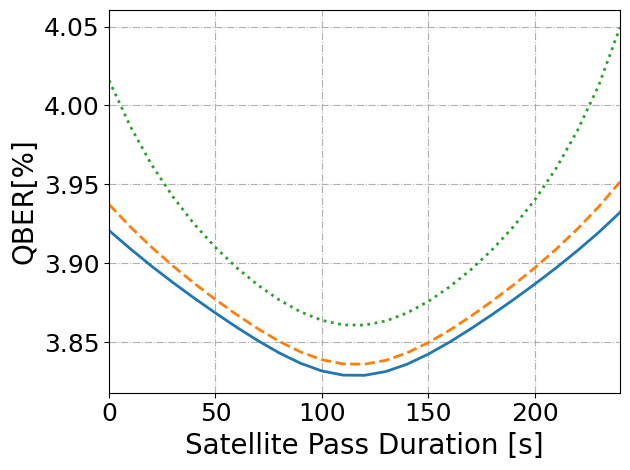

In [6]:
plt.plot(t, qber_values[0][:]*100)
plt.plot(t, qber_values[1][:]*100, ls='--')
plt.plot(t, qber_values[2][:]*100, ls=':')

plt.xlabel(r"Satellite Pass Duration [s]")
plt.ylabel(r"QBER[%]")

plt.xlim(0, 240)

plt.grid()
plt.tight_layout()
# plt.savefig(f'results/qber_{n_s}.png')
# print(f"✅ Saved as: qber_{n_s}.png")

In [24]:
np.save('results/qber_analysis_bbm92_test1_new', qber_values)

findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times Ne

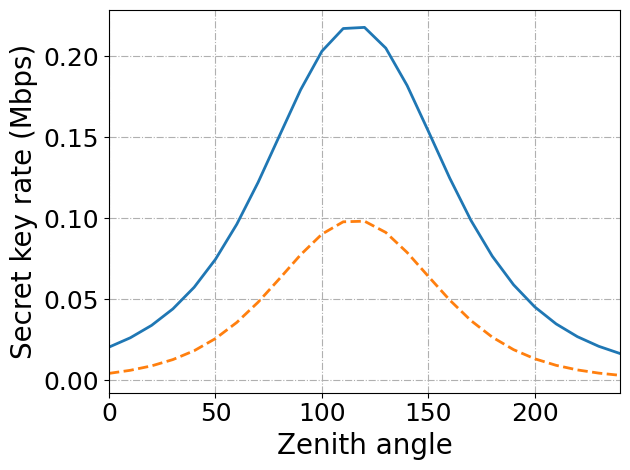

In [8]:
# Q_1, e_1 = compute_Q_1_e_1_ex(
#             sigma_theta_x, sigma_theta_y, slant_path_lst[jdx], mu_x, mu_y,
#             zenith_angle_rad, h_OGS, h_atm, w_L, tau_zen, Cn2_profile,
#             a, e_0, p_dark, e_pol, p_AP, n_s, wavelength
#         )
# skr_values[idx][jdx] = compute_SKR(
#             qber_values[idx][jdx], yield_values[idx][jdx], Q_1, e_1
#         )


plt.plot(t, skr_values[0][:]/10**6)
plt.plot(t, skr_values[1][:]/10**6, ls='--')
# plt.plot(t, skr_values[2][:]/10**6, ls=':')


# plt.plot(zenith_angle_deg_list, yield_values[0][:])
# plt.plot(zenith_angle_deg_list, yield_values[1][:], ls='--')

plt.xlabel(r"Zenith angle")
plt.ylabel(r"Secret key rate (Mbps)")

plt.xlim(0, 240)

plt.grid()
plt.tight_layout()
# plt.savefig(f'results/skr_{n_s}.png')
# print(f"✅ Saved as: skr_{n_s}.png")

In [9]:
np.save('results/skr_analysis_bbm92_test1_8', skr_values)

In [7]:
np.save('results/qber_analysis', qber_values)
np.save('results/skr_analysis', skr_values)